# Stroke Risk Assessment: Developing a Machine Learning Tool to Predict Patient Outcomes from Clinical Features

In [215]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import skew, kurtosis, shapiro
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report


# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import unsupervised learning libraries
import sklearn.feature_extraction
import sklearn.cluster
from sklearn.decomposition import PCA 

# Import evaluation libraries
import sklearn.metrics as skmetrics

In [216]:
# Load the data
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [217]:
# Display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [218]:
# Calculate summary statistics of numerical columns
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data preprocessing

In [219]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [220]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [221]:
# Feature Scaling
scaler = StandardScaler()
scaled_columns = ['age', 'avg_glucose_level', 'bmi']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

In [222]:
# Prepare the data for modeling
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

In [223]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Model

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Predict using the Decision Tree model
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Accuracy: 0.910958904109589
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.20      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



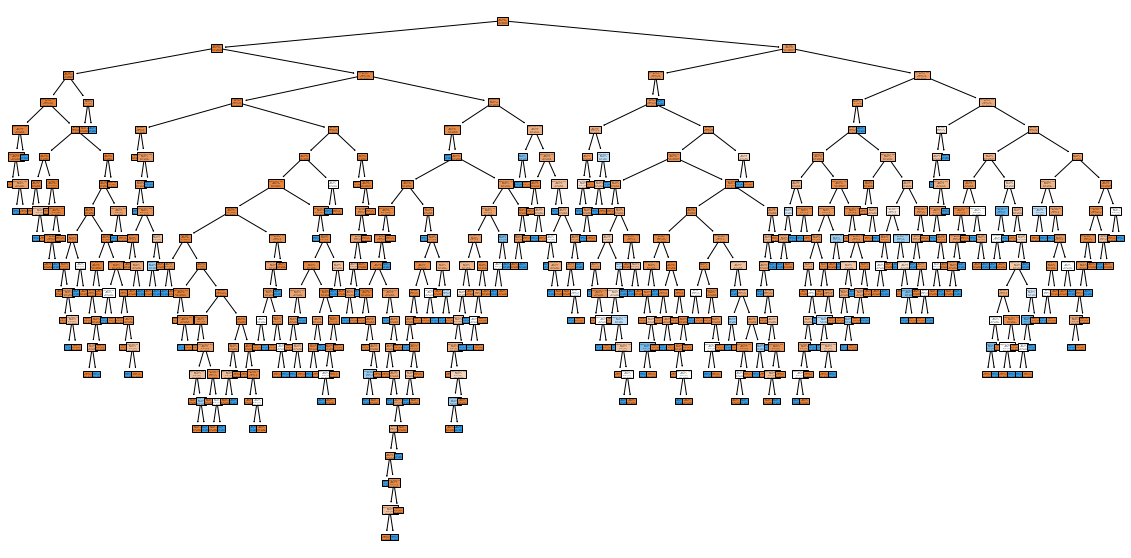

In [225]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'])
plt.show()

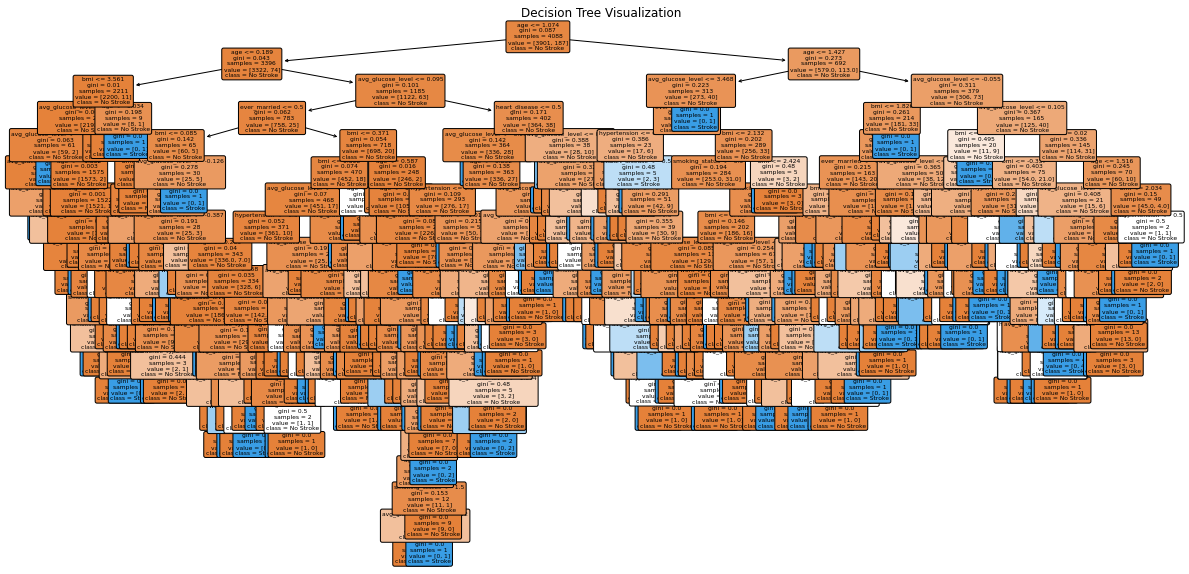

In [226]:
plt.figure(figsize=(20, 10))
tree = plot_tree(dt_classifier,
                 filled=True,
                 feature_names=X.columns,
                 class_names=['No Stroke', 'Stroke'],
                 rounded=True,
                 fontsize=6)

# Adding a title and labels
plt.title('Decision Tree Visualization')
plt.xlabel('Feature Names')
plt.ylabel('Depth of Tree')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


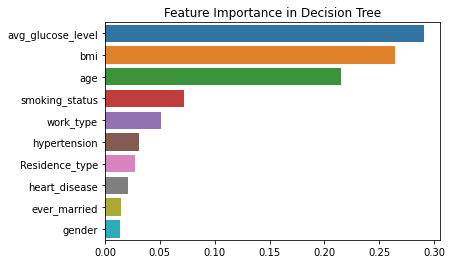

In [227]:
import seaborn as sns

feature_importance = pd.Series(dt_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Decision Tree')
plt.show()

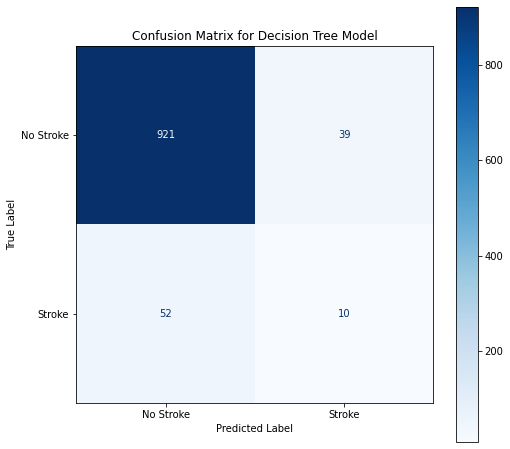

In [228]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, dt_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])

# Use matplotlib to plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')

# Adding a title
ax.set_title('Confusion Matrix for Decision Tree Model')

# Additional plot customizations
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

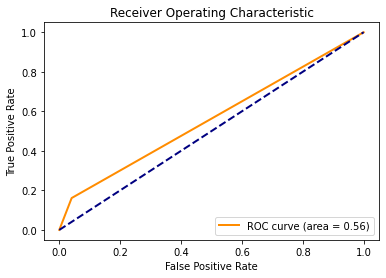

In [229]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## AdaBoost Model

In [230]:
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost model using the previously defined Decision Tree as the base estimator
ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)

# Fit the AdaBoost model
ada_classifier.fit(X_train, y_train)

# Predict using the AdaBoost model
ada_predictions = ada_classifier.predict(X_test)

# Evaluate the AdaBoost model
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_report = classification_report(y_test, ada_predictions)

print("AdaBoost Accuracy:", ada_accuracy)
print("AdaBoost Classification Report:\n", ada_report)

AdaBoost Accuracy: 0.9148727984344422
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.24      0.19      0.22        62

    accuracy                           0.91      1022
   macro avg       0.60      0.58      0.59      1022
weighted avg       0.91      0.91      0.91      1022



/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


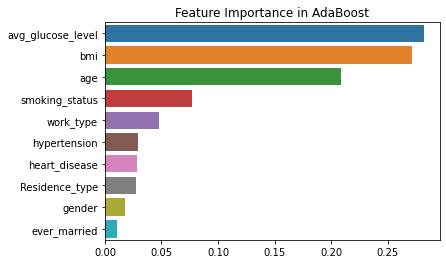

In [231]:
feature_importance = pd.Series(ada_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in AdaBoost')
plt.show()

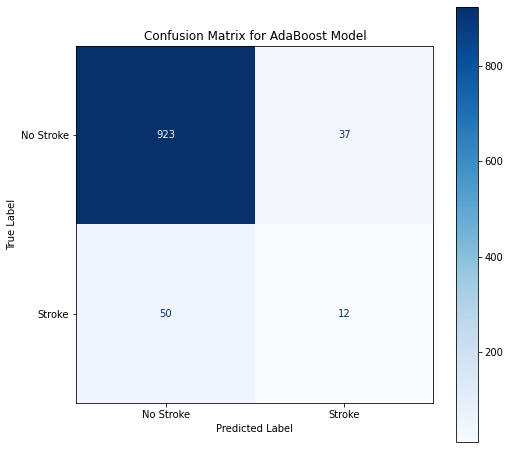

In [232]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, ada_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])

# Use matplotlib to plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues')

# Adding a title
ax.set_title('Confusion Matrix for AdaBoost Model')

# Additional plot customizations
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

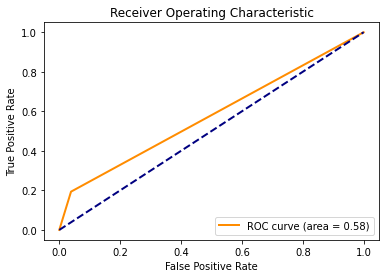

In [233]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, ada_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()